# Mass Balance Analysis: Analysing Tracer Mass and Fluxes in TUFLOW FV Outputs

**This notebook provides a guide on how to import and preprocess the necessary data files, create data frames, and perform calculations to derive useful metrics for tracer mass and fluxes.**

## Import Libraries

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib.ticker import ScalarFormatter

## Read tuflowfv tracer mass output csv  
**'TRACE_1_MASS [units]'** represents the mass of tracer 1 in the whole model domain.   
Units are *concentration units x m<sup>3</sup>*.  
We have used the conconetration units as **mg/L** for this exercise.


In [113]:
mass_bal = r"X:\Scratch1\scratchers\Reintraid\high_res\dispersion\mass_bal\003\RT_dis_mass_bal_003_MASS - Copy.csv"
df_mass = pd.read_csv(mass_bal, delimiter=',', usecols=['TIME', 'VOLUME [m^3]', 'TRACE_1_MASS [units]'])

# head of mass_bal dataframe
print(df_mass.tail())

                     TIME  VOLUME [m^3]  TRACE_1_MASS [units]
3556  26/09/2022 04:00:00  7.843297e+11          7.812574e+13
3557  26/09/2022 05:00:00  7.915375e+11          7.884979e+13
3558  26/09/2022 06:00:00  8.000135e+11          7.969088e+13
3559  26/09/2022 07:00:00  8.073269e+11          8.042501e+13
3560  26/09/2022 08:00:00  8.117801e+11          8.087006e+13


## Create additional columns for trcaer mass dataframe
Two new columns are added to the dataframe df_mass.  
'TRACE_1_MASS [g]' is as same as the TRACE_1_MASS [units].    
'TRACE_1_CONC' is the concentration of the TRACE_1 which has units of **g/m<sup>3</sup> or mg/L**

In [114]:
df_mass['TRACE_1_MASS [g]'] = df_mass['TRACE_1_MASS [units]']
df_mass['TRACE_1_CONC'] = df_mass['TRACE_1_MASS [g]'] / df_mass['VOLUME [m^3]']
print(df_mass.head())

                  TIME  VOLUME [m^3]  TRACE_1_MASS [units]  TRACE_1_MASS [g]  \
0  01/05/2022 00:00:00  7.915585e+11          7.914863e+13      7.914863e+13   
1  01/05/2022 01:00:00  7.917750e+11          7.917126e+13      7.917126e+13   
2  01/05/2022 02:00:00  7.882823e+11          7.882071e+13      7.882071e+13   
3  01/05/2022 03:00:00  7.828647e+11          7.828067e+13      7.828067e+13   
4  01/05/2022 04:00:00  7.816740e+11          7.816029e+13      7.816029e+13   

   TRACE_1_CONC  
0     99.990879  
1     99.992119  
2     99.990460  
3     99.992591  
4     99.990904  


## Slice the dataframe based on start and end times

In [137]:
#add start and end time to slice them easier
start_time = '01/05/2022 00:00:00'
end_time = '30/08/2022 00:00:00'

# Convert 'TIME' column to datetime format
df_mass['TIME'] = pd.to_datetime(df_mass['TIME'], dayfirst=True)

# Convert start and end times to datetime format
start_time = pd.to_datetime(start_time, dayfirst=True)
end_time = pd.to_datetime(end_time, dayfirst=True)

# Slice the dataframe based on the start and end times
df_slicemass = df_mass[(df_mass['TIME'] >= start_time) & (df_mass['TIME'] <= end_time)]
#df_sliceflux = df_flux[(df_flux['TIME'] >= start_time) & (df_flux['TIME'] <= end_time)]

#head rows
print(df_slicemass.head())
#print(df_sliceflux.head())


                 TIME  VOLUME [m^3]  TRACE_1_MASS [units]  TRACE_1_MASS [g]  \
0 2022-05-01 00:00:00  7.915585e+11          7.914863e+13      7.914863e+13   
1 2022-05-01 01:00:00  7.917750e+11          7.917126e+13      7.917126e+13   
2 2022-05-01 02:00:00  7.882823e+11          7.882071e+13      7.882071e+13   
3 2022-05-01 03:00:00  7.828647e+11          7.828067e+13      7.828067e+13   
4 2022-05-01 04:00:00  7.816740e+11          7.816029e+13      7.816029e+13   

   TRACE_1_CONC  
0     99.990879  
1     99.992119  
2     99.990460  
3     99.992591  
4     99.990904  


## Create plots for tracer mass, volume and concentration


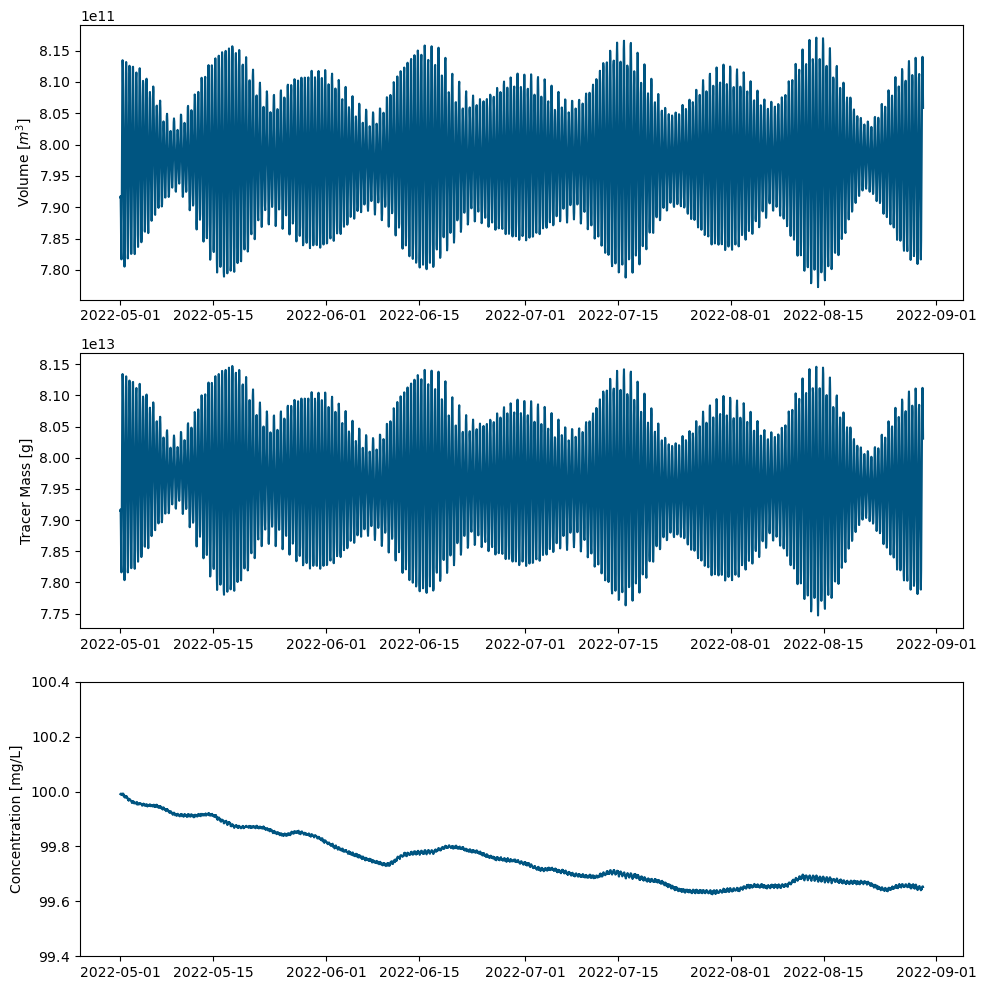

In [138]:
# Create a figure with three subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# Plot timeseries for 'VOLUME [m^3]'
axs[0].plot(df_slicemass['TIME'], df_slicemass['VOLUME [m^3]'],color='#005581')
#axs[0].set_title('Volume')
#axs[0].set_xlabel('Time')
axs[0].set_ylabel('Volume [$m^3$]')
axs[0].tick_params(axis='x', rotation=0)

# Plot timeseries for 'TRACE_1_MASS [g]'
axs[1].plot(df_slicemass['TIME'], df_slicemass['TRACE_1_MASS [g]'],color='#005581')
#axs[1].set_title('Tracer Mass')
#axs[1].set_xlabel('Time')
axs[1].set_ylabel('Tracer Mass [g]')
axs[1].tick_params(axis='x', rotation=0)

# Plot timeseries for 'Tracer Concentration'
axs[2].plot(df_slicemass['TIME'], df_slicemass['TRACE_1_CONC'],color='#005581')
#axs[2].set_title('Tracer Concentration')
#axs[2].set_xlabel('Time')
axs[2].set_ylim(99.4, 100.4)
axs[2].set_ylabel('Concentration [mg/L]')
axs[2].tick_params(axis='x', rotation=0)

# Format the y-axis ticks using ScalarFormatter
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))  # Change these values to control the range of exponents
axs[2].yaxis.set_major_formatter(formatter)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()
fig.savefig('../figures/SiteA_Mass_Balance_highdif1.png',dpi=300)
#fig.savefig('my_figure.png', dpi=300, bbox_inches='tight')


Calculate Mass balance error

In [139]:
# Find the total mass of tracer present in the model domain at the end of simulation
final_tracer_mass = df_slicemass['TRACE_1_MASS [g]'].iloc[-1]

# Set the time of mass added (considering only the minute part of the time)
mass_added_time = pd.to_datetime('01/05/2022 00:00', format='%d/%m/%Y %H:%M')

In [140]:
# Find the mass of tracer added
df_time = df_slicemass.copy()
df_time['TIME'] = pd.to_datetime(df_time['TIME'], format='%d/%m/%Y %H:%M:%S')
mass_added = df_time.loc[df_time['TIME'].dt.strftime('%d/%m/%Y %H:%M') == mass_added_time.strftime('%d/%m/%Y %H:%M'), 'TRACE_1_MASS [g]'].iloc[0]
# Calculate the mass balance error as a percentage
mass_balance_error = ((final_tracer_mass - mass_added) / mass_added) * 100

print('Mass balance error: {:.2f}%'.format(mass_balance_error))

Mass balance error: 1.46%
